<a href="https://colab.research.google.com/github/tolgaSarmi/Kmean/blob/main/kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


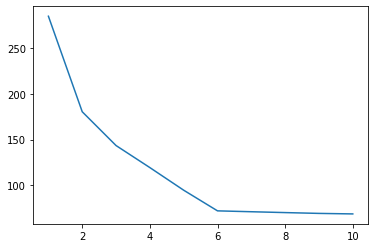

In [3]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def create_centroids(data1, k): 
    # To create centroids in dataset
    
    centroids1=np.empty((k,8))
    # Selecting random integers between 0 and 800.000
    for i in range(k):
        centroids1[i]=data1[np.random.randint(0, len(data1))]
    return centroids1

def calculate_distance(data1, point):
    # To calculate the distances
    
    data2=np.sum(np.absolute(data1-point), axis=1) #Broadcasting, calculating absolute values and summing.
    return data2

def assign_centroids(distances1):
    # To find the indices of minimum values
    
    assign=np.argmin(distances1, axis=0) # Columnwise operation
    return assign

def move_centroids(data1, assignedCentroids1, centroids1):
    # To calculate the mean of each feature for each category in order to assign new centroids
    
    groupedData=np.column_stack((data1,assignedCentroids1)) # To add categories to data in order to grouping.
     
    # To iterate through each category
    lenght= len(np.unique(assignedCentroids1)) 
    for i in range(lenght):
        group=groupedData[groupedData[:, -1]==i] # Filter each category
        newCentroid=np.mean(group, axis = 0) # Calculate means of each column
        centroids1[i]=newCentroid[:-1]  # Do not add category indice

def distortion_cost(data1, assignedCentroids1, centroids1):
    # To calculate distortion cost
    
    sumDifference=np.zeros_like(centroids1[0]) # Create a (k, ) array filled with zeros.
    groupedData=np.column_stack((data1,assignedCentroids1)) # To add categories to data in order to grouping.
    
    # To iterate through each category
    lenght= len(np.unique(assignedCentroids1)) 
    for i in range(lenght):
        group=groupedData[groupedData[:, -1]==i]  # Filter each category
        
        sumDifference+=np.sum(np.power(np.absolute(group[:,:-1]-centroids1[i]),2),axis=0) # Calculate variance in each category and 
                                                                                            #add their cumulative to the array 
    return np.sum(sumDifference/len(data1))

def restart_KMeans(data, k, numOfAssingnments=10, numOfRepeats=10):
    distortion=[]
    for i in range(numOfAssingnments):
         # Creating centroids 
        centroids=create_centroids(data, k)
        
        for j in range(numOfRepeats):# To select different starting centroids and to repeat the process several time.
            # Calculating the distance between each point in centroids and other points
            lst=[]
            for i in centroids:
                lst.append(calculate_distance(data, i))
            distances=np.array(lst) #(k,800000) array popuated with distance of each instance to each centroids

            # To find the nearest centroid
            assignedCentroids=assign_centroids(distances) 

            move_centroids(data, assignedCentroids, centroids) 
        
          # To check the performance of the algorithm
        
        distortion.append(distortion_cost(data, assignedCentroids, centroids))
    return min(distortion),k
    

def main():
    
    # Loading data from CVS file
    data = np.loadtxt('/content/gdrive/MyDrive/clusteringData.csv', delimiter=',')
    y=[]
    x=[]
    for k in range(1, 11): # Getting distortion cost function for different number of categories
        result=restart_KMeans(data, k, 10, 10)
        y.append(result[0])
        x.append(result[1])
    sns.lineplot(x,y) 
    plt.show()
    
# Run the main() function
if __name__ == '__main__':
    main()